In [1]:
year = 2024; day = 14

In [2]:
def quadrant_x(x):
    if x < W // 2:
        return 0
    if x > W // 2:
        return 1
    return None

def quadrant_y(y):
    if y < H // 2:
        return 0
    if y > H // 2:
        return 1
    return None

def get_quadrant(pos):
    x, y = pos
    return (quadrant_x(x), quadrant_y(y))

In [3]:
import numpy as np
from aocd import get_data, submit

data = get_data(year=year, day=day)

data = data.strip()

data = data.split("\n")


def parse_line(line):
    line = line.replace(" ", " ").replace("=", "").replace("v", "").replace("p", "").replace(",", " ").split()
    line = list(map(int, line))
    pos = tuple(line[:2])
    vel = tuple(line[2:])
    return pos, vel

data = [parse_line(l) for l in data]

data[:5]

[((14, 11), (-25, -54)),
 ((58, 14), (-37, 28)),
 ((4, 96), (-76, 48)),
 ((27, 96), (30, 88)),
 ((37, 41), (-63, -26))]

In [4]:
def visualize(robots):
    grid = np.zeros((H, W))
    for (x, y), _ in robots:
        y = int(y)
        x = int(x)
        grid[y, x] = 1
    return grid

def move(robots):
    new_robots = []
    for (x, y), (dx, dy) in robots:
        new_x = (x + dx) % W
        new_y = (y + dy) % H
        assert new_x >= 0
        assert new_y >= 0
        new_robots.append(((new_x, new_y), (dx, dy)))
    return new_robots

def frame_i(raw_robots, i):
    new_robots = []
    for (x, y), (dx, dy) in raw_robots:
        new_x = (x + dx*i) % W
        new_y = (y + dy*i) % H
        new_robots.append(((new_x, new_y), (dx, dy)))
    return new_robots

In [5]:
W = 101
H = 103
robots = data.copy()
raw_robots = data.copy()

grids = []
for _ in range(40_000):
    robots = move(robots)
    grids.append(visualize(robots))


In [6]:
from collections import defaultdict
qs = defaultdict(int)
for r in frame_i(raw_robots, 100):
    q = get_quadrant(r[0])
    print(r, q)
    if q[0] is not None and q[1] is not None:
        qs[q] += 1

((39, 70), (-25, -54)) (0, 1)
((95, 33), (-37, 28)) (1, 0)
((80, 55), (-76, 48)) (1, 1)
((98, 38), (30, 88)) (1, 0)
((100, 16), (-63, -26)) (1, 0)
((7, 83), (58, 1)) (0, 1)
((37, 68), (42, -51)) (0, 1)
((36, 14), (-3, -94)) (0, 0)
((85, 30), (72, 11)) (1, 0)
((17, 1), (-51, 93)) (0, 0)
((97, 30), (-43, -59)) (1, 0)
((15, 45), (38, 95)) (0, 0)
((8, 84), (-3, 19)) (0, 1)
((79, 5), (-67, 5)) (1, 0)
((24, 36), (73, -66)) (0, 0)
((86, 8), (-32, 50)) (1, 0)
((37, 69), (-85, 86)) (0, 1)
((88, 79), (-83, 69)) (1, 1)
((9, 57), (-17, -3)) (0, 1)
((41, 23), (28, 10)) (0, 0)
((23, 8), (-2, -25)) (0, 0)
((28, 93), (16, 20)) (0, 1)
((41, 36), (-92, 64)) (0, 0)
((37, 29), (15, 81)) (0, 0)
((85, 75), (38, -65)) (1, 1)
((68, 93), (-81, 4)) (1, 1)
((69, 6), (-61, 75)) (1, 0)
((82, 87), (12, 53)) (1, 1)
((68, 68), (47, 51)) (1, 1)
((51, 15), (55, -96)) (1, 0)
((98, 42), (42, 61)) (1, 0)
((13, 14), (84, 76)) (0, 0)
((15, 47), (-10, 99)) (0, 0)
((84, 31), (-76, 62)) (1, 0)
((20, 34), (-32, -72)) (0, 0)
((1

In [7]:
from math import prod

prod(qs.values())

225943500

In [8]:
offset_x = 14
offset_y = 94
cycle_x = 417 - 13
cycle_y = 196 - 93

# for i in range(100):
#     if (offset_x + i*cycle_x - offset_y) % cycle_y == 0:
#         print(offset_x + i*cycle_x)
#         print( (offset_x + i*cycle_x) % offset_y)


for i in range(1000):
    if (offset_y + i*cycle_y - offset_x) % cycle_x == 0:
        print(offset_y + i*cycle_y)
        print( (offset_y + i*cycle_y - offset_x) % cycle_x)

37586
0
79198
0


In [9]:
offset = offset_y - offset_x

for i in range(1000):
    if (i*cycle_x) % cycle_y -offset == 0:
        print(offset_x + i*cycle_x)
    if (i*cycle_y) % cycle_x + offset == 0:
        print(offset_y + i*cycle_y)

37586
79198
120810
162422
204034
245646
287258
328870
370482


In [10]:
(6377 - offset_x) % cycle_x

303

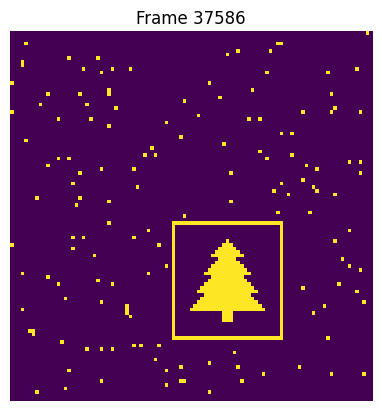

In [11]:
import matplotlib.pyplot as plt
# i = 417
# i = 417 + 20*(417 - 13)
# i = 14
# i = 6377
# i = 94
# i = 93 + (196 - 93)
i = 37586
fig, ax = plt.subplots()
grid = visualize(frame_i(raw_robots, i))
#
# plot single grid
ax.imshow(grid, cmap="viridis")
ax.set_title(f"Frame {i}")
ax.axis("off") # turn off axes for visual appeal
plt.show()


In [12]:
for i in range(37586):
    if frame_i(raw_robots, 37586) == frame_i(raw_robots, i):
        print(i)

6377
16780
27183


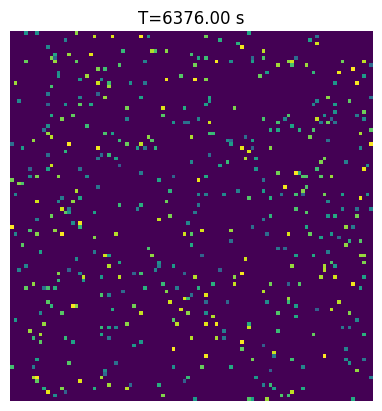

In [13]:
from IPython.display import HTML
from matplotlib import animation
random_colors = np.random.random((H, W))*0.7+0.3
#make animation
fig, ax = plt.subplots()

easing = np.arange(-1, 1, 0.01)**3
def animate(i):
    t = 6377 + easing[i]
    t = np.round(t, 2)


    grid = visualize(frame_i(raw_robots, t))
    # apply colors
    # grid = np.array([random_colors for _ in range(3)])
    grid = grid * random_colors
    ax.clear()
    ax.imshow(grid, cmap="viridis")
    ax.set_title(f"T={t:0.2f} s")
    ax.axis("off") # turn off axes for visual appeal

ani = animation.FuncAnimation(fig, animate, frames=len(easing), interval=20)

HTML(ani.to_jshtml())

In [ ]:
ani.save("day14.gif", writer="imagemagick")